In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

# Loading the Data in

In [3]:
df = pd.read_csv('fake_bills.csv', sep=';')
df

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


# Statistical Summary

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [65]:
df.describe()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
count,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000
mean,0.663705,171.959193,104.031333,103.921476,4.485967,3.153083,112.674757
std,0.472603,0.305457,0.299605,0.324181,0.663813,0.231466,0.873222
min,0.000000,171.040000,103.140000,102.910000,2.980000,2.270000,109.490000
25%,0.000000,171.750000,103.825000,103.710000,4.015000,2.990000,112.020000
50%,1.000000,171.960000,104.040000,103.920000,4.310000,3.140000,112.960000
75%,1.000000,172.170000,104.230000,104.150000,4.870000,3.315000,113.340000
max,1.000000,173.010000,104.880000,104.950000,6.900000,3.910000,114.320000


In [5]:
df = df.dropna() # drop any rows with missing data

In [6]:
df['is_genuine']

0        True
1        True
2        True
3        True
4        True
        ...  
1495    False
1496    False
1497    False
1498    False
1499    False
Name: is_genuine, Length: 1463, dtype: bool

In [51]:
df.loc[:, 'is_genuine'] = df['is_genuine'].astype('category')
df.loc[:, 'is_genuine'] = df['is_genuine'].cat.codes

In [52]:
df

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,171.46,103.36,103.66,3.77,2.99,113.09
2,1,172.69,104.48,103.50,4.40,2.94,113.16
3,1,171.36,103.91,103.94,3.62,3.01,113.51
4,1,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,0,171.75,104.38,104.17,4.42,3.09,111.28
1496,0,172.19,104.63,104.44,5.27,3.37,110.97
1497,0,171.80,104.01,104.12,5.51,3.36,111.95
1498,0,172.06,104.28,104.06,5.17,3.46,112.25


# Data Visualisation

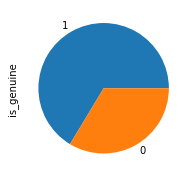

In [53]:
fig = plt.figure(figsize = (10, 3))
df['is_genuine'].value_counts(normalize=True).plot.pie()
plt.show()

We can see here we have a class imbalance. We have more data for genuine bills than fake ones. We must deal with this appropiately before using this dataset to make predictions.

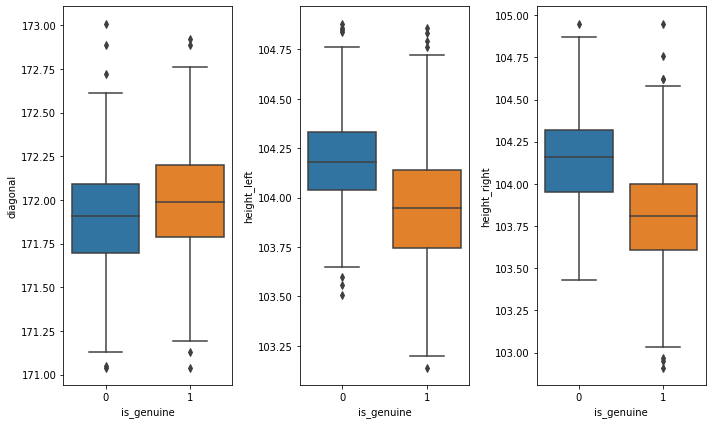

In [54]:
fig = plt.figure(figsize=(10, 6))
fig.add_subplot(1, 3, 1)
box = sns.boxplot(x=df['is_genuine'], y = df['diagonal'])
fig.add_subplot(1, 3, 2)
box = sns.boxplot(x=df['is_genuine'], y=df['height_left'])
fig.add_subplot(1, 3, 3)
box = sns.boxplot(x=df['is_genuine'], y = df['height_right'])
plt.tight_layout()
plt.show()

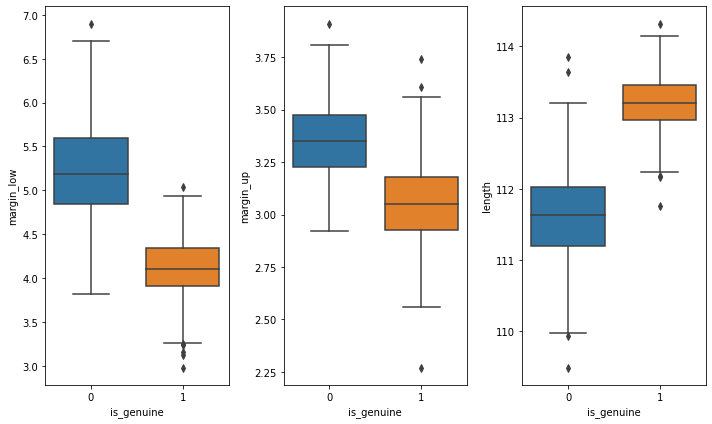

In [55]:
fig = plt.figure(figsize=(10, 6))
fig.add_subplot(1, 3, 1)
box = sns.boxplot(x = df['is_genuine'], y = df['margin_low'])
fig.add_subplot(1, 3, 2)
box = sns.boxplot(x = df['is_genuine'], y = df['margin_up'])
fig.add_subplot(1, 3, 3)
box = sns.boxplot(x = df['is_genuine'], y = df['length'])
plt.tight_layout()
plt.show()

These boxplots gives us some good insights about genuine and fake bills. We can see in general genuine bills have greater lengths than fake ones for example.

# Correlation Plot & Train-Test Split

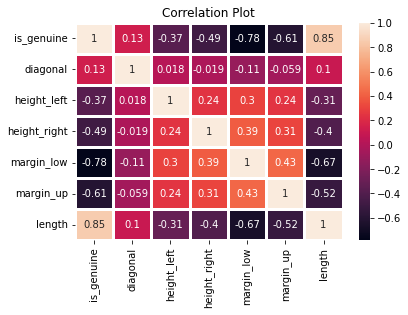

In [56]:
corr_plot = sns.heatmap(df.corr(), annot = True, linewidths = 3)
plt.title('Correlation Plot')
plt.show()

An interesting thing to note here is that the length of the bills is strongly correlated to it being genuine. So generally speaking bills with larger lengths are more likely to be genuine.

In [57]:
X = df.drop(columns='is_genuine') 
y = df['is_genuine']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=21)

# Feature Scaling

In [59]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

We can see here that there is a class imbalance. This means that we have more data on genuine bills than fake bills. If we do not deal with this imbalance as it will skew the distribution of class labels. This causes the model to be biased towards the majority class which in this case is genuine bills.

In [60]:
log_reg = LogisticRegression(class_weight = {0:0.66, 1:0.34})

In [61]:
log_reg = log_reg.fit(X_train, y_train)

In [62]:
y_pred = log_reg.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,

# Model Evaluation Metrics

In [63]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[117,   2],
       [  1, 246]], dtype=int64)

In [64]:
f1 = f1_score(y_test, y_pred)
f1

0.9939393939393938

This f1 score tell us that our model is working well. Generally speaking there are ways of improving the model if the f1 score is very low but since it is not we do not need to make these improvements.